In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('stores_sales_forecasting.csv', encoding ='latin1')

In [67]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [69]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [70]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [71]:
print('Total Sales: ',df['Sales'].sum())
print('Total Profit: ', df['Profit'].sum())

Total Sales:  741999.7953
Total Profit:  18451.272800000006


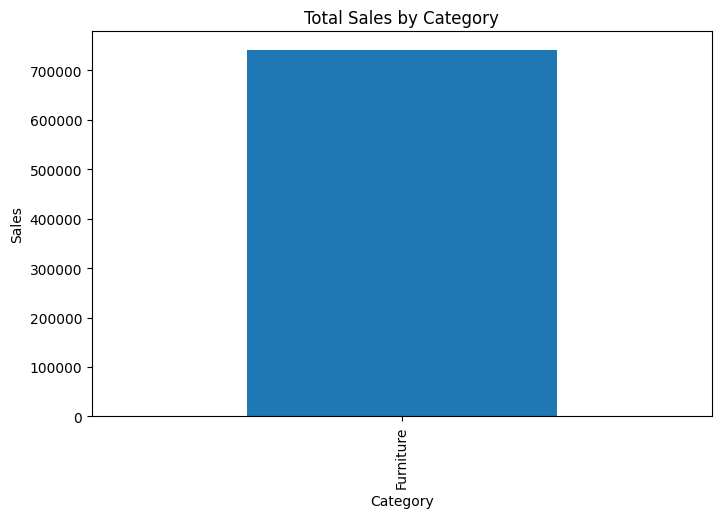

In [72]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(
    kind='bar',
    figsize=(8,5),
    title="Total Sales by Category"
)

plt.ylabel("Sales")
plt.show()


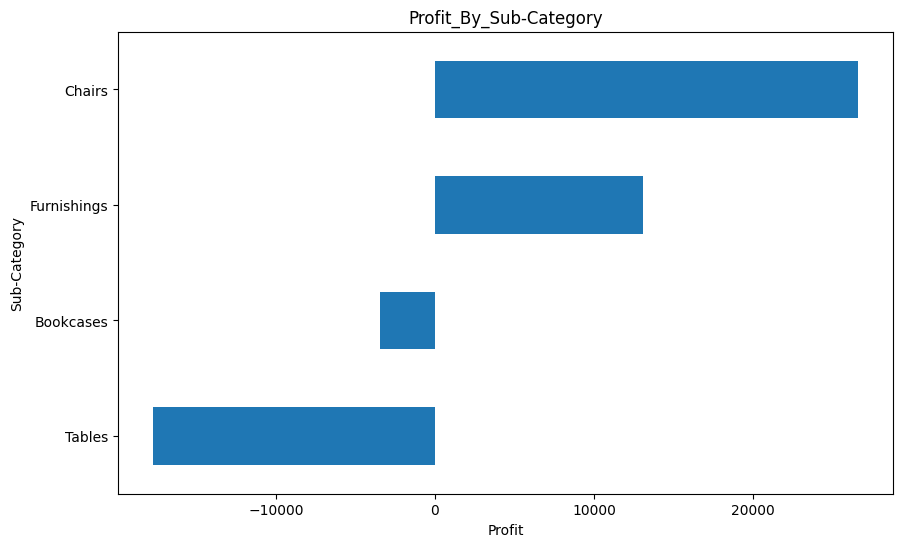

In [73]:
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(10,6))
sub_profit.plot(kind='barh')
plt.title('Profit_By_Sub-Category')
plt.xlabel('Profit')
plt.show()


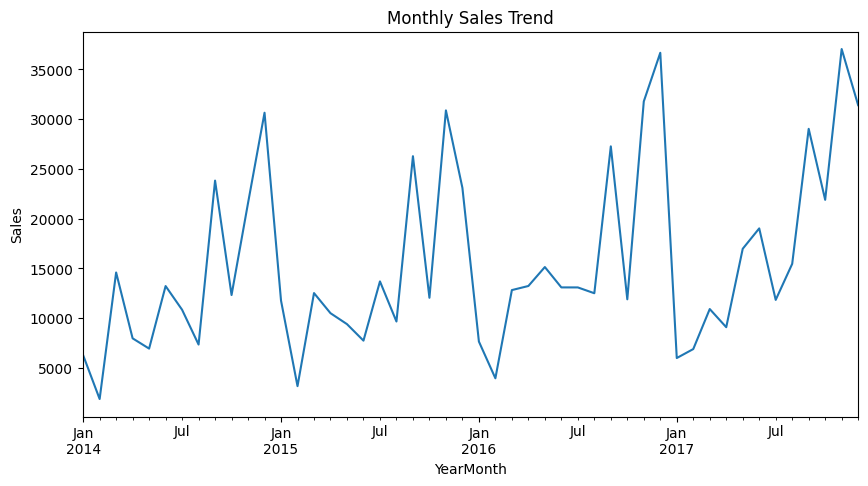

In [74]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum()
monthly_sales.plot(figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()

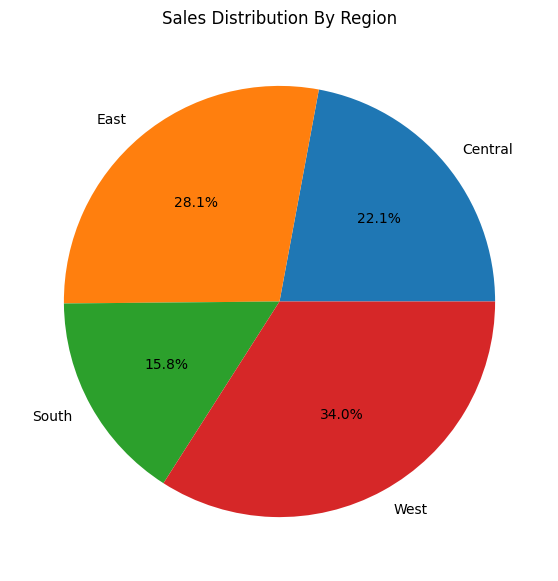

In [75]:
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(
    kind = 'pie',
    autopct = '%1.1f%%',
    figsize =(7,7),
    title = "Sales Distribution By Region"
)
plt.ylabel("")
plt.show()

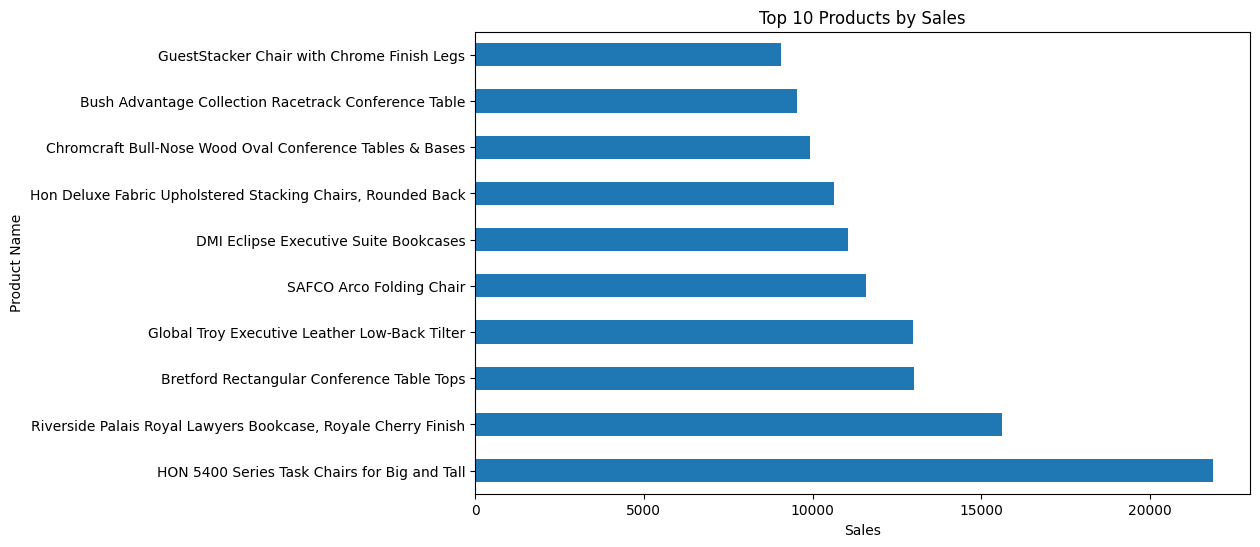

In [76]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.show()


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [78]:
x = df[['Quantity', 'Discount']]
y = df['Sales']

In [79]:
x_train, x_test, y_train , y_test = train_test_split(x,y , test_size= 0.2, random_state=42)

In [ ]:
model = LinearRegression()
   


model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
pred = model.predict(x_test)
print('Mean_squared_error: ', mean_squared_error(y_test, pred))

Mean_squared_error:  256940.90155129804


In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(x_train,y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
from sklearn.metrics import mean_absolute_error, r2_score

pred_rf = rf.predict(x_test)
print('MAE: ', mean_absolute_error(y_test, pred_rf))
print('R2_score:', r2_score(y_test,pred_rf))

MAE:  275.9926671779976
R2_score: 0.2081516392117766


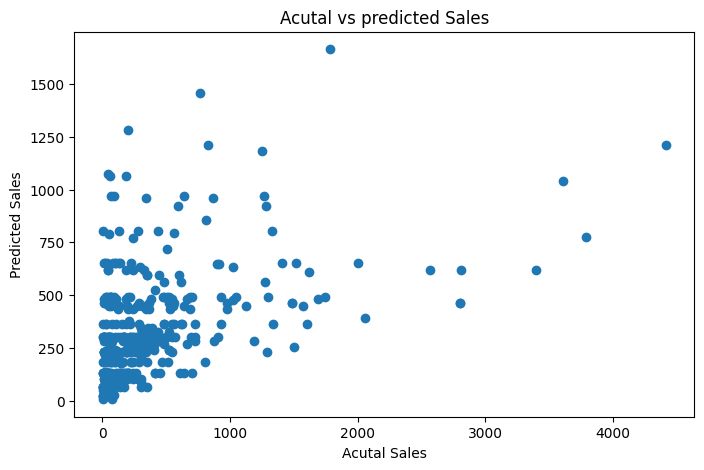

In [95]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_rf)
plt.xlabel('Acutal Sales')
plt.ylabel('Predicted Sales')
plt.title('Acutal vs predicted Sales')
plt.show()

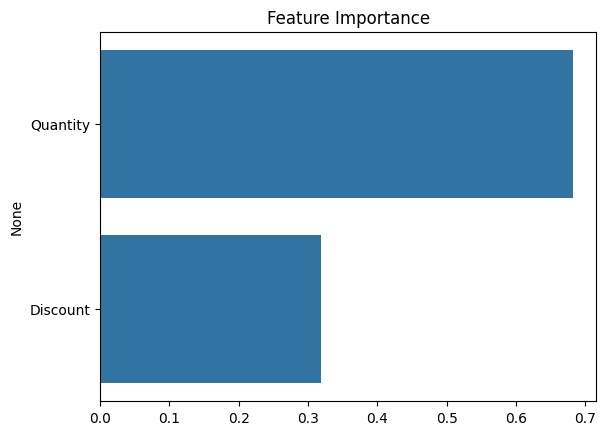

In [93]:
import seaborn as sns

importance = rf.feature_importances_
sns.barplot(x=importance, y=x.columns)
plt.title("Feature Importance")
plt.show()
